In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train= pd.read_csv("house_Train_data.csv")
data_test= pd.read_csv("house_Test_data.csv")

In [3]:
columns_to_drop=["Id","YrSold","MoSold",'PoolQC','Alley','Fence','MiscFeature',"MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch","KitchenAbvGr","BedroomAbvGr", "HalfBath","BsmtFullBath","BsmtHalfBath","LowQualFinSF","BsmtUnfSF","BsmtFinSF2","MSSubClass","OverallCond", "LotArea"]

In [4]:
data_train_clean = data_train.drop(columns_to_drop,axis=1)
data_test_clean = data_test.drop(columns_to_drop,axis=1)

In [5]:
data_train_clean.head(n=5)

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,3,836,TA,TA,Y,192,84,WD,Normal,250000


In [6]:
data_test_clean.head(n=5)

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RL,60.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,...,Unf,1,246,TA,TA,N,0,0,WD,Normal
1,RL,61.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,1,280,TA,TA,Y,0,0,WD,Normal
2,RL,70.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,RFn,1,254,TA,TA,Y,0,16,WD,Family
3,RL,79.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Fin,2,539,TA,TA,Y,0,0,WD,Normal
4,RM,24.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,...,Unf,2,440,TA,TA,Y,0,0,WD,Normal


In [7]:
data_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 58 columns):
MSZoning         1100 non-null object
LotFrontage      908 non-null float64
Street           1100 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-null object
MasVnrType       1094 non-null object
MasVnrArea       1094 non-null float64
ExterQual        1100 non-null object
ExterCond        1100

In [8]:
data_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 57 columns):
MSZoning         360 non-null object
LotFrontage      293 non-null float64
Street           360 non-null object
LotShape         360 non-null object
LandContour      360 non-null object
Utilities        360 non-null object
LotConfig        360 non-null object
LandSlope        360 non-null object
Neighborhood     360 non-null object
Condition1       360 non-null object
Condition2       360 non-null object
BldgType         360 non-null object
HouseStyle       360 non-null object
OverallQual      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null object
RoofMatl         360 non-null object
Exterior1st      360 non-null object
Exterior2nd      360 non-null object
MasVnrType       358 non-null object
MasVnrArea       358 non-null float64
ExterQual        360 non-null object
ExterCond        360 non-null object
Foundati

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [10]:
to_train=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for i in range(len(to_train)):
    data_train_clean[to_train[i]] = data_train_clean[to_train[i]].fillna("None")



In [11]:

for i in range(len(to_train)):
    data_train_clean[to_train[i]] = le.fit_transform(data_train_clean[to_train[i]])

    

In [12]:
data_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 58 columns):
MSZoning         1100 non-null int32
LotFrontage      908 non-null float64
Street           1100 non-null int32
LotShape         1100 non-null int32
LandContour      1100 non-null int32
Utilities        1100 non-null int32
LotConfig        1100 non-null int32
LandSlope        1100 non-null int32
Neighborhood     1100 non-null int32
Condition1       1100 non-null int32
Condition2       1100 non-null int32
BldgType         1100 non-null int32
HouseStyle       1100 non-null int32
OverallQual      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null int32
RoofMatl         1100 non-null int32
Exterior1st      1100 non-null int32
Exterior2nd      1100 non-null int32
MasVnrType       1100 non-null int32
MasVnrArea       1094 non-null float64
ExterQual        1100 non-null int32
ExterCond        1100 non-null int32
Fo

In [13]:
to_change2=data_test_clean.select_dtypes(include=['object']).columns

In [14]:
to_change2

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
to_test=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for i in range(len(to_test)):
    data_test_clean[to_test[i]] = data_test_clean[to_test[i]].fillna("None")


In [16]:

for i in range(len(to_test)):
    data_test_clean[to_test[i]] = le.fit_transform(data_test_clean[to_test[i]])


In [17]:
data_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 57 columns):
MSZoning         360 non-null int32
LotFrontage      293 non-null float64
Street           360 non-null int32
LotShape         360 non-null int32
LandContour      360 non-null int32
Utilities        360 non-null int32
LotConfig        360 non-null int32
LandSlope        360 non-null int32
Neighborhood     360 non-null int32
Condition1       360 non-null int32
Condition2       360 non-null int32
BldgType         360 non-null int32
HouseStyle       360 non-null int32
OverallQual      360 non-null int64
YearBuilt        360 non-null int64
YearRemodAdd     360 non-null int64
RoofStyle        360 non-null int32
RoofMatl         360 non-null int32
Exterior1st      360 non-null int32
Exterior2nd      360 non-null int32
MasVnrType       360 non-null int32
MasVnrArea       358 non-null float64
ExterQual        360 non-null int32
ExterCond        360 non-null int32
Foundation       360 non-nu

In [18]:
to=['LotFrontage','MasVnrArea','GarageYrBlt']


In [19]:
for j in range(len(to)):
    data_train_clean = data_train_clean.fillna(data_train_clean[to[j]].mean())
    data_test_clean = data_test_clean.fillna(data_test_clean[to[j]].mean())

In [20]:
data_train_clean.columns

Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [21]:
data_test_clean.shape

(360, 57)

In [22]:
X=data_train_clean[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
Y=data_train_clean['SalePrice']
X_test=data_test_clean[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]


In [23]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...
1095,6,2006,2006,1314,1314,1314,2,6,2,440
1096,6,1914,2006,684,773,1355,1,7,0,0
1097,8,1986,1986,1074,1088,1088,1,5,2,461
1098,4,1936,1950,672,757,1324,1,6,1,240


In [24]:
X.shape

(1100, 10)

In [25]:
Y=Y.to_numpy()

In [26]:
Y

array([208500, 181500, 223500, ..., 170000, 128000, 157000], dtype=int64)

In [27]:
len(np.unique(Y))

568

In [28]:
X.shape

(1100, 10)

In [29]:
Y.shape

(1100,)

In [30]:
Y=np.asarray(Y).astype('float32')

In [31]:
from keras import models

Using TensorFlow backend.


In [32]:
from keras.layers import Dense

In [33]:
model = models.Sequential()

In [34]:
model.add(Dense(30,activation='relu', input_shape=(10,)))

In [35]:
model.add(Dense(50,activation='relu'))

In [36]:
model.add(Dense(40,activation='relu'))

In [37]:
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 3,961
Trainable params: 3,961
Non-trainable params: 0
_________________________________________________________________


In [40]:
x_val=X[:500]

In [41]:
x_train_new=X[500:]

In [42]:
y_val=Y[:500]

In [43]:
y_train_new=Y[500:]

In [44]:
hist=model.fit(x_train_new,y_train_new,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Train on 600 samples, validate on 500 samples
Epoch 1/100
600/600 [==============================] - 0s 502us/step - loss: -288792590.8467 - accuracy: 0.0000e+00 - val_loss: -687508996.6080 - val_accuracy: 0.0000e+00
Epoch 2/100
600/600 [==============================] - 0s 113us/step - loss: -1177997018.4533 - accuracy: 0.0000e+00 - val_loss: -1931064327.1680 - val_accuracy: 0.0000e+00
Epoch 3/100
600/600 [==============================] - 0s 111us/step - loss: -2842155642.8800 - accuracy: 0.0000e+00 - val_loss: -4191642611.7120 - val_accuracy: 0.0000e+00
Epoch 4/100
600/600 [==============================] - 0s 108us/step - loss: -5695195095.0400 - accuracy: 0.0000e+00 - val_loss: -7888147980.2880 - val_accuracy: 0.0000e+00
Epoch 5/100
600/600 [==============================] - 0s 120us/step - loss: -10110255185.9200 - accuracy: 0.0000e+00 - val_loss: -13353363226.6240 - val_accuracy: 0.0000e+00
Epoch 6/100
600/600 [==============================] - 0s 118us/step - loss: -16587607818

600/600 [==============================] - 0s 100us/step - loss: -12266405681780.0527 - accuracy: 0.0000e+00 - val_loss: -13003953868374.0156 - val_accuracy: 0.0000e+00
Epoch 47/100
600/600 [==============================] - 0s 96us/step - loss: -13250979510790.8262 - accuracy: 0.0000e+00 - val_loss: -14037195903991.8066 - val_accuracy: 0.0000e+00
Epoch 48/100
600/600 [==============================] - 0s 111us/step - loss: -14303760510266.0273 - accuracy: 0.0000e+00 - val_loss: -15145956500570.1113 - val_accuracy: 0.0000e+00
Epoch 49/100
600/600 [==============================] - 0s 98us/step - loss: -15418701416584.5312 - accuracy: 0.0000e+00 - val_loss: -16303175141163.0078 - val_accuracy: 0.0000e+00
Epoch 50/100
600/600 [==============================] - 0s 95us/step - loss: -16577772524666.8809 - accuracy: 0.0000e+00 - val_loss: -17520802740043.7754 - val_accuracy: 0.0000e+00
Epoch 51/100
600/600 [==============================] - 0s 98us/step - loss: -17812053109855.5742 - accura

Epoch 91/100
600/600 [==============================] - 0s 90us/step - loss: -152621086062673.9375 - accuracy: 0.0000e+00 - val_loss: -158659603184222.2188 - val_accuracy: 0.0000e+00
Epoch 92/100
600/600 [==============================] - 0s 95us/step - loss: -158997773116156.5938 - accuracy: 0.0000e+00 - val_loss: -165301369601785.8438 - val_accuracy: 0.0000e+00
Epoch 93/100
600/600 [==============================] - 0s 91us/step - loss: -165664886417435.3125 - accuracy: 0.0000e+00 - val_loss: -172194301009199.0938 - val_accuracy: 0.0000e+00
Epoch 94/100
600/600 [==============================] - 0s 93us/step - loss: -172546907355217.9375 - accuracy: 0.0000e+00 - val_loss: -179286909606952.9688 - val_accuracy: 0.0000e+00
Epoch 95/100
600/600 [==============================] - 0s 93us/step - loss: -179541867589795.8438 - accuracy: 0.0000e+00 - val_loss: -186493857347665.9062 - val_accuracy: 0.0000e+00
Epoch 96/100
600/600 [==============================] - 0s 93us/step - loss: -1868159

In [45]:
import matplotlib.pyplot as plt

In [46]:
h=hist.history
print(h)

{'val_loss': [-687508996.608, -1931064327.168, -4191642611.712, -7888147980.288, -13353363226.624, -21243555004.416, -32112935960.576, -46023708704.768, -64295619461.12, -86889779757.056, -114873363529.728, -149210636222.464, -190588916858.88, -239443838500.864, -297662228987.904, -364395291738.112, -443014166609.92, -531796097499.136, -632364316229.632, -748525424476.16, -877677179830.272, -1022718767005.696, -1184503882055.68, -1367814281625.6, -1566865389256.704, -1787068017541.12, -2034953339535.36, -2298886056050.688, -2588139906400.256, -2914760077082.624, -3253538056568.832, -3631002769424.384, -4041242956529.664, -4479931845181.44, -4958020488396.8, -5475758164148.224, -6026000261447.68, -6614887266516.992, -7251322843693.056, -7913047515463.68, -8649916700164.096, -9419315207995.393, -10238593456930.816, -11119232293011.455, -12021202839142.4, -13003953868374.016, -14037195903991.809, -15145956500570.111, -16303175141163.008, -17520802740043.775, -18813349080858.625, -20187668

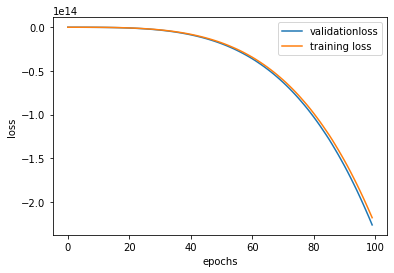

In [47]:
plt.plot(h['val_loss'],label='validationloss')
plt.plot(h['loss'],label='training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [48]:
model.evaluate(X,Y)[1]

1100/1100 [==============================] - 0s 30us/step


0.0

In [49]:
outputs = model.predict(X_test)

In [50]:
outputs

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],